In [2]:
!pip install autocorrect

     |████████████████████████████████| 624kB 6.7MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.4.0-cp37-none-any.whl size=621775 sha256=9817e5ae9fddfda245cdabf76c8e625c069343b73e79a9fb43022e72052e5238
  Stored in directory: /root/.cache/pip/wheels/1d/b0/d4/b941891ad0f8d8847be03583e21e68ed4732d763c71a6c0943
Successfully built autocorrect


In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from autocorrect import Speller
from tqdm import tqdm
import re
stemmer = PorterStemmer()
spell = Speller()

In [4]:
data = pd.read_csv('/content/spam.csv')

In [5]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],axis = 1,inplace=True)#used inplace to remove them permanently

In [8]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.rename(columns={'v1':'labels', 'v2':'messages'},inplace=True)#to rename columns

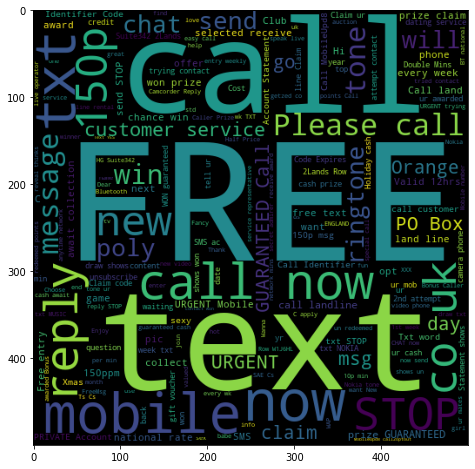

In [10]:
#data visualization
#visualizing spam words
spam_words = ' '.join(list(data[data['labels'] == 'spam']['messages']))
spam_wc = WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

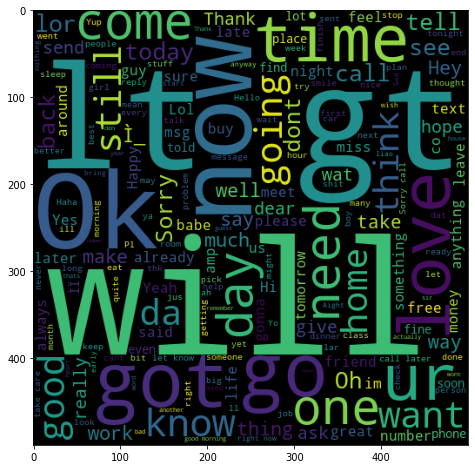

In [11]:
#visualizing ham words
ham_words = ' '.join(list(data[data['labels'] == 'ham']['messages']))
ham_wc = WordCloud(width=500,height=500).generate(ham_words)
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)
plt.show()

In [12]:
#data preprocessing
#data.head()
data.shape
import nltk
nltk.download('punkt')
nltk.download('stopwords')
#Encoding the Labels
data['labels'] = data['labels'].apply(lambda x: 1 if x=='spam' else 0 )

#preprocessing the Messages
new_data = []

for i in tqdm(range(data.shape[0])):
  lines = data.iloc[i,1]
  #removing non alphabetic characters
  lines = re.sub('[^A-Za-z]',' ',lines)
  
  #lower casing every word
  lines = lines.lower()

  #tokenization
  tokenized_lines= word_tokenize(lines)

  #stop words removal, stemming, spell correction
  processed_lines=[]
  for i in tokenized_lines:
    if i not in set(stopwords.words('english')):
      processed_lines.append(spell(stemmer.stem(i)))

  final_lines=' '.join(processed_lines)
  new_data.append(final_lines)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


  0%|          | 0/5572 [00:00<?, ?it/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


100%|██████████| 5572/5572 [04:31<00:00, 20.56it/s]


In [13]:
new_data

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

In [14]:
len(new_data)

5572

In [15]:
Y = data['labels']
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

In [16]:
Y.value_counts()

0    4825
1     747
Name: labels, dtype: int64

In [40]:
#Test_Train_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,Y,test_size=0.30)

In [41]:
#vectorization
from sklearn.feature_extraction.text import CountVectorizer 
matrix=CountVectorizer()

In [42]:
X_train_vect=matrix.fit_transform(X_train).toarray()
X_test_vect=matrix.transform(X_test).toarray()

In [43]:
#training Model

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train_vect,Y_train)
model.classes_
Y_pred=model.predict(X_test_vect)
Y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(Y_test,Y_pred) * 100



87.73923444976076

In [39]:
confusion_matrix(Y_test,Y_pred)


array([[1690,  238],
       [  57,  244]])